In [2]:
#import librarie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#import data set
dataset=pd.read_csv('/content/Ads_CTR_Optimisation.csv')

In [14]:
import random 
from pandas.core.arrays.datetimelike import delta_to_nanoseconds
#Implment UCB
N = 10000 # even 100 working enough interesting # thomson sampling is general more powerful than ucb 
d=10
ads_selected =[]
numbers_of_rewards_1=[0]*d
numbers_of_rewards_0= [0]*d
total_reward=0
for n in range(0,N):
  ad=0
  max_random = 0
  for i in range(0,d):
    random_beta = random.betavariate(numbers_of_rewards_1[i]+1, numbers_of_rewards_0[i]+1)
    if(random_beta> max_random):
      max_random= random_beta
      ad =i 
  ads_selected.append(ad)
  reward = dataset.values[n,ad]
  if reward==1:
    numbers_of_rewards_1[ad]= numbers_of_rewards_1[ad]+1
  else:
    numbers_of_rewards_0[ad]= numbers_of_rewards_0[ad]+1

  total_reward= total_reward+reward

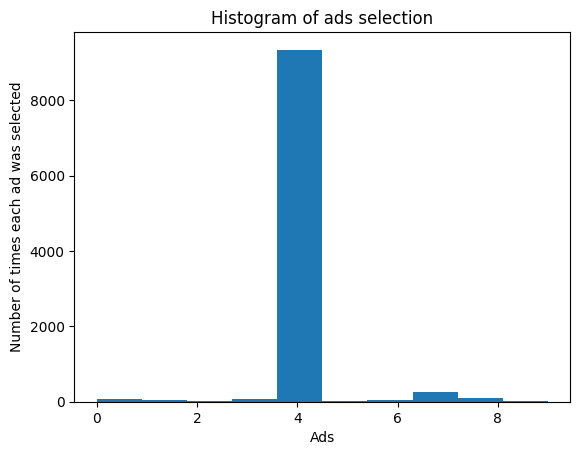

In [15]:
plt.hist(ads_selected)
plt.title('Histogram of ads selection')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()